In [ ]:
### DO NOT INCLUDE IN LAB 
ikea = pd.read_csv('ikea.csv')
from sklearn.utils import shuffle
ikea = shuffle(ikea)
ikea.drop(columns = {'Unnamed: 0', 'short_description'}, inplace = True)
ikea.to_csv('ikea_shuffled.csv')

# Packaging & sharing functions 

So you've created several functions to help you complete analysis on a dataset. But you know that you'll need to use these functions again in the future, and you know the work you've done will be helpful to other colleagues doing similar work. How can you package your functions up in a way that they 'stand alone'? We want them to be easily shareable, readable, and well commented so that any user can utilize them (including you, months from now when you've forgotten the details of the project). We can do this by utilizing **self documentation** in our code base! 

[This](https://realpython.com/documenting-python-code/) is a great article that goes into detail on the importance of documentation & different methods. We will go over some key strategies in this practice. 

Let's bring in some data, create some functions, and document & package them up. 

## Loading in our dataset 

We will read in `ikea.csv`, which is a spreadsheet containing furniture items available at IKEA & corresponding attributes, from [this source](https://www.kaggle.com/datasets/ahmedkallam/ikea-sa-furniture-web-scraping?resource=download).  

Let's read in `ikea.csv` and take a peek at the contents.

In [ ]:
# read data in 
import pandas as pd 
ikea = pd.read_csv('ikea_shuffled.csv', nrows = 200)
ikea.drop(columns = 'Unnamed: 0', inplace = True)

# print 
ikea.head()

## Creating a set of functions to work with our data

Say we are working for an interior design firm and our client has requested we select cabinets for an upcoming remodeling project. 

Let's create a function we can use to isolate all items in our dataframe which are of the category 'Cabinets & cupboards'. This `find_products` function will take input arguments `ikea_df`, which is our catalog dataframe, and `item_category`, which is a string containing the name of furniture we want to filter for. The goal is to return a list of IKEA product names that we can return to our client. 


In [ ]:
def find_products(ikea_df, item_category):
    selected_category = ikea_df[(ikea_df['category'] == item_category)]
    return selected_category

In [ ]:
# use our function to find all keys whose values contain 'Cabinets & cupboards'
selection = find_products(ikea, 'Cabinets & cupboards')
selection.head()

Now we have a dataframe of potential cabinets that fit our specifications! However, due to a dispute between the client and the Lundgren family, the client has requested that we not include any of Gillis Lundgren's designs.  
Let's use this information to narrow down our list. 

We don't want to modify our original funciton since we want to be able to use it for other queries, so let's nest it within a new function named `remove_designer`. This function will contain `find_products` nested within, so we need to make sure we include those input arguments too. 

In [ ]:
def find_products_remove_designer(ikea_df, item_category, designer_to_exclude):
    selected_category = find_products(ikea_df, item_category)
    refined_selection = selected_category[selected_category['designer'] != designer_to_exclude]
    return refined_selection

In [ ]:
refined_selection = find_products_remove_designer(ikea, 'Cabinets & cupboards', 'Gillis Lundgren')
refined_selection.head()

Taking a look at our new dictionary shows that his designs are removed! We can double check this by computing length

In [ ]:
print(len(selection))
print(len(refined_selection))

Or using a conditional

In [ ]:
'Gillis Lundgren' in refined_selection['designer']

<hr style="border:2px solid gray"> </hr>

### Now you try! 

What if the client wants to make sure the design was from a specific designer? Create a function named `select_designer` that takes input arguments `ikea_df`, `item_category`, and `designer_to_select`. Have it return a `refined_selection` that includes **only** designs from the input designer name. 

Use the function to print all `Cabinets & cupboards` designed in-house by `IKEA of Sweden`. 

In [ ]:
### BEGIN SOLUTION 

def find_products_select_designer(ikea_df, item_category, designer_to_select):
    selected_category = find_products(ikea_df, item_category)
    refined_selection = selected_category[selected_category['designer'] == designer_to_select]
    return refined_selection

find_prodcuts_select_designer(ikea, 'Cabinets & cupboards', 'IKEA of Sweden')

### END SOLUTION 

<hr style="border:2px solid gray"> </hr>

Finally, we want to be able to filter by pricepoint. Our client will let us know their budget so we want to be able to filter our `refined_selection` to account for this. The input argument will be our `input_selection` which can be either the original `ikea` dataframe, one filtered for a particular product, or one filtered for a product/designer combination. It will also take `min_price` and `max_price` to define the budget range. 

Say the client wants to spend betwen 400-600 on cabinets designed by anyone besides Gillis Lundgren, so we can use our `refined_selection` as the `input_selection` argument. 

In [ ]:
def filter_pricepoint(input_selection, min_price, max_price):
    final_selection = input_selection[(input_selection['price'] <= max_price) & 
                                      (input_selection['price'] > min_price)]
    return final_selection

final_selection = filter_pricepoint(refined_selection, 400, 600)
final_selection

## Adding docstrings to our functions 

**Docstrings** are strings built into your functions that can be queried using the built in `help()` function. We can print the docstrings for one of python's built in functions, `enumerate`, like so:

In [ ]:
help(enumerate)

You'll see a few key features such as a summary of the function's use case, describing the input type/description for the function to work properly, and describing the expected outputs. 

We can implement these docstrings in our user-defined functions as well, making sure to include the same key properties. This is done using a string in triple quotation marks `"""` in the first line of the function. Let's add docstrings to the 3 functions we made earlier. We will also add some comments within the function to indicate what is happening at each step. You don't need to comment every single line, but its a good idea to comment out blocks that accomplish certain sub-steps. 

In [ ]:
def find_products(ikea_df, item_category):
    '''
    | Help on user-defined function find_products:
    |
    | This function takes inputs: 
    | - ikea_df - dataframe containing ikea catalog items
    | - item_category - string containing product types in catalog 
    | 
    | This function returns:
    | - selected_category - a dataframe containing only catalog items that match the input product_type
    '''
    selected_category = ikea_df[(ikea_df['category'] == item_category)]
    return selected_category

def find_products_remove_designer(ikea_df, item_category, designer_to_exclude):
    '''
    | Help on user-defined function remove_designer:
    |
    | This function takes inputs: 
    | - ikea_df - dataframe containing ikea catalog items
    | - item_category - string containing product types in catalog 
    | - designer_to_exclude - string containing name of designer we want to remove from selection 
    | 
    | This function returns:
    | - selected_category - a dataframe containing only catalog items that match the input product_type
    | AND does NOT include designer_to_exclude
    '''
    # first get category
    selected_category = find_products(ikea_df, item_category)
    # then filter to remove designer
    refined_selection = selected_category[selected_category['designer'] != designer_to_exclude]
    return refined_selection

def filter_pricepoint(input_selection, min_price, max_price):
    '''
    | Help on user-defined function filter_pricepoint:
    |
    | This function takes inputs: 
    | - input_selection - dataframe containing ikea catalog items. can be original or filtered.
    | - min_price - int or float indicating min budget. function will keep everything <= this value. 
    | - max_price - int or float indicating max budget. function will keep everything > this value. 
    | 
    | This function returns:
    | - final_selection - a dataframe containing only catalog items within budget range 
    '''
    final_selection = input_selection[(input_selection['price'] <= max_price) & 
                                      (input_selection['price'] > min_price)]
    return final_selection

In [ ]:
help(find_products)

In [ ]:
help(find_products_remove_designer)

In [ ]:
help(filter_pricepoint)

<hr style="border:2px solid gray"> </hr>

### Now you try! 

Add docstrings for the `select_designer` function you created earlier. Print the docstring using `help()`. 

In [ ]:
### BEGIN SOLUTION 

def find_products_select_designer(ikea_df, item_category, designer_to_select):
    '''
    | Help on user-defined function remove_designer:
    |
    | This function takes inputs: 
    | - ikea_df - dataframe containing ikea catalog items
    | - item_category - string containing product types in catalog 
    | - designer_to_select - string containing name of designer we want to remove from selection 
    | 
    | This function returns:
    | - selected_category - a dataframe containing only catalog items that match the input product_type
    | AND includes only designer_to_select
    '''
    # first get category
    selected_category = find_products(ikea_df, item_category)
    # then filter to remove designer
    refined_selection = selected_category[selected_category['designer'] == designer_to_select]
    return refined_selection

help(find_products_select_designer)

### END SOLUTION 

<hr style="border:2px solid gray"> </hr>

## Packaging a set of functions into a module

A **module** is a set of definitions/functions packaged into a script that can be called into any workspace. This is simply a `.py` file that contains our function definitions. For example a module called `ikea_functions.py` could be called in using `import ikea_functions`. The syntax is the same as when we import other packages such as pandas or matplotlib. 

Let's create a module called `ikea_functions` that contains all the functions we defined. You can do this in a text editor where you simply name the file `ikea_functions.py` or you can use the method below to write a file directly from jupyter:

In [ ]:
%%writefile ikea_functions.py

def find_products(ikea_df, item_category):
    '''
    | Help on user-defined function find_products:
    |
    | This function takes inputs: 
    | - ikea_df - dataframe containing ikea catalog items
    | - item_category - string containing product types in catalog 
    | 
    | This function returns:
    | - selected_category - a dataframe containing only catalog items that match the input product_type
    '''
    selected_category = ikea_df[(ikea_df['category'] == item_category)]
    return selected_category

def find_products_remove_designer(ikea_df, item_category, designer_to_exclude):
    '''
    | Help on user-defined function remove_designer:
    |
    | This function takes inputs: 
    | - ikea_df - dataframe containing ikea catalog items
    | - item_category - string containing product types in catalog 
    | - designer_to_exclude - string containing name of designer we want to remove from selection 
    | 
    | This function returns:
    | - selected_category - a dataframe containing only catalog items that match the input product_type
    | AND does NOT include designer_to_exclude
    '''
    # first get category
    selected_category = find_products(ikea_df, item_category)
    # then filter to remove designer
    refined_selection = selected_category[selected_category['designer'] != designer_to_exclude]
    return refined_selection

def filter_pricepoint(input_selection, min_price, max_price):
    '''
    | Help on user-defined function filter_pricepoint:
    |
    | This function takes inputs: 
    | - input_selection - dataframe containing ikea catalog items. can be original or filtered.
    | - min_price - int or float indicating min budget. function will keep everything <= this value. 
    | - max_price - int or float indicating max budget. function will keep everything > this value. 
    | 
    | This function returns:
    | - final_selection - a dataframe containing only catalog items within budget range 
    '''
    final_selection = input_selection[(input_selection['price'] <= max_price) & 
                                      (input_selection['price'] > min_price)]
    return final_selection

Let's clear our variable space, import our module using `import ikea_functions` & re-load our ikea file to test this. 

In [ ]:
# reset variables space 
# run this then type 'y' when prompted
%reset

Make sure our functions are gone

In [ ]:
help(find_prodcuts)

In [ ]:
# read data in 
import pandas as pd 
ikea = pd.read_csv('ikea_shuffled.csv', nrows = 200)
ikea.drop(columns = 'Unnamed: 0', inplace = True)

import ikea_functions

# and use dir to print all functions within the module 
dir(ikea_functions)

You see above that our four functions are listed within the new `ikea_functions` we imported! We can access a particular function using dot notation like this: 

In [ ]:
ikea_functions.find_products(ikea, 'Beds').head()

We could also import only a single function from the module & use it, like so: 

In [ ]:
from ikea_functions import find_products

find_products(ikea, 'Beds').head()

See that our docstrings can be printed too! 

In [ ]:
help(ikea_functions.find_products_remove_designer)

Importing a module is a lot less cumbersome than redefining the function in every script you want to use it. This makes it easy to re-use functions in multiple scripts. If you make a change to a function in the module, it will carry through to every usage of the function thereafter, whereas if you were to have the function defined in multiple scripts it is likely you will forget to change every instance and the "same" function will behave differently in multiple scripts. 

It also makes it more easily shareable, as you can simply send one .py file to a colleage and they can import the functions you made. This way they will not have to hard code them themselves or copy/paste from a different script. The use of docstrings in your module functions allows you or a colleague to easily access documentation so you don't need to re-inspect the entire funtion to remember inputs, formats, etc. 

<hr style="border:2px solid gray"> </hr>

### Now you try! 

Use the `find_products_remove_designer` function from our module (by importing the function directly or using dot notation) and find all 'Beds' NOT designed by 'IKEA of Sweden'

In [ ]:
### BEGIN SOLUTION 

ikea_functions.find_products_remove_designer(ikea, 'Beds', 'IKEA of Sweden').head()

### END SOLUTION

<hr style="border:2px solid gray"> </hr>

# Practice on your own 

In this practice section you will be working with video game data from IGN, a video game website, found [here](https://github.com/erilyth/DeepLearning-Challenges/blob/master/Sentiment_Analysis/ign.csv). 

Load in the first 500 rows of `ign.csv` like so:

In [ ]:
### DO NOT INCLUDE 
import pandas as pd
ign = pd.read_csv('ign.csv', nrows = 500)
ign.drop(columns = 'Unnamed: 0', inplace = True)
ign.head()
ign_genres = ign['genre'].str.split(',', expand=True)
ign_genres.rename(columns = {0: 'primary_genre', 1: 'secondary_genre'}, inplace = True)
ign.drop(columns = 'genre', inplace = True)
ign = pd.merge(ign, ign_genres, left_index=True, right_index=True)
ign.to_csv('ign_edit.csv')

In [1]:
import pandas as pd
ign = pd.read_csv('ign_edit.csv', nrows = 500)
ign.drop(columns = 'Unnamed: 0', inplace = True)
ign.head()

,score_phrase,title,url,platform,score,editors_choice,release_year,release_month,release_day,primary_genre,secondary_genre
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Y,2012,9,12,Platformer,NaN
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Y,2012,9,12,Platformer,NaN
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,N,2012,9,12,Puzzle,NaN
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,N,2012,9,11,Sports,NaN
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,N,2012,9,11,Sports,NaN


#### Exercise 1. Create a function called `get_platform` that returns a dataframe containing only data from the platform listed in the input argument (iPad, Xbox 360, Playstation Vita, ...). Use this function to create a dataframe of games for the PlayStation Vita. Add useful docstrings to the function. 

#### Use this function to create a dataframe named `ps_vita` that contains all the games released on the 'Playstation Vita'. 

In [2]:
### BEGIN SOLUTION 

def get_platform(games_df, target_platform):
    """
    | Help on user-defined function get_platform:
    |
    | This function works on the ign dataframe & takes inputs: 
    | - games_df - dataframe of ign games 
    | - target_platform - a string naming the gaming platform the games were released on 
    |
    | This function returns:
    | - platform_only - a dataframe containing only games released on the input target_platform
    """
    platform_only = games_df[games_df['platform'] == target_platform]
    return platform_only

ps_vita = get_platform(ign, 'PlayStation Vita')
ps_vita.head()

### END SOLUTION 

,score_phrase,title,url,platform,score,editors_choice,release_year,release_month,release_day,primary_genre,secondary_genre
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Y,2012,9,12,Platformer,NaN
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Y,2012,9,12,Platformer,NaN
56,Okay,Madden NFL 13,/games/madden-nfl-2013/vita-128100,PlayStation Vita,6.0,N,2012,8,24,Sports,NaN
88,Bad,FIFA Soccer 13,/games/fifa-2013/vita-115689,PlayStation Vita,4.0,N,2012,10,12,Sports,NaN
91,Mediocre,New Little King's Story,/games/new-kings-story/vita-116369,PlayStation Vita,5.8,N,2012,10,11,RPG,NaN


#### Exercise 2. Create a function named `bar_plot_genres` that makes a bar plot out of the `genre` column for the data for a certain target platform. The function should take `target_platform` as an input argument, and return a bar plot where each bar measures the number of games in each category. You will need to create and add a new column, `primary_genre`, to the dataframe, which contains either the only genre listed or only the primary (first) one listed for each game. You do not need to return the altered dataframe. 

#### Add meaningful comments to the blocks of code within your function & add descriptive docstrings. 

#### Finally, use this function to plot the genres of PlayStation Vita games. 

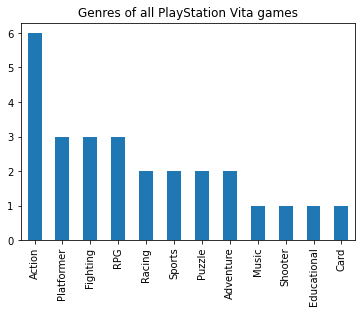

In [4]:
### BEGIN SOLUTION 

def bar_plot_genres(games_df, target_platform):
    """
    | Help on user-defined function bar_plot_genres:
    |
    | This function creates a bar plot of primary genres for games of a certain platform. 
    |
    | Takes the following inputs: 
    | - games_df - dataframe of ign games 
    | - target_platform - a string naming the gaming platform the games were released on
    |
    | This function returns:
    | - bar plot showing count of each primary genre for that gaming platform 
    """
    # get games from this platform 
    this_platform = get_platform(games_df, target_platform)
    # plot primary genre
    this_platform.primary_genre.value_counts().plot.bar(title = 'Genres of all ' + target_platform + ' games')

bar_plot_genres(ign, 'PlayStation Vita')

### END SOLUTION 

#### Exercise 3. Say you have found an old module in your code base, and you don't remember the details of what each function does. Using `get_platform` function you just made, demonstrate how would you go about accessing the documentation for a forgotten function. 

In [5]:
help(get_platform)

Help on function get_platform in module __main__:

get_platform(games_df, target_platform)
    | Help on user-defined function get_platform:
    |
    | This function works on the ign dataframe & takes inputs: 
    | - games_df - dataframe of ign games 
    | - target_platform - a string naming the gaming platform the games were released on 
    |
    | This function returns:
    | - platform_only - a dataframe containing only games released on the input target_platform



#### Exercise 4. Create a module that packages together your `get_platform` and `bar_plot_genres` functions, named `ign_functions.py`. You can either use a text editor to create a .py file, or write the file directly from Jupyter Notebook. 

In [ ]:
### BEGIN SOLUTION 

%%writefile ign_functions.py # will not work if after commented line, line magic must be ONLY thing in cell

def get_platform(games_df, target_platform):
    """
    | Help on user-defined function get_platform:
    |
    | This function works on the ign dataframe & takes inputs: 
    | - games_df - dataframe of ign games 
    | - target_platform - a string naming the gaming platform the games were released on 
    |
    | This function returns:
    | - platform_only - a dataframe containing only games released on the input target_platform
    """
    platform_only = games_df[games_df['platform'] == target_platform]
    return platform_only

def bar_plot_genres(games_df, target_platform):
    """
    | Help on user-defined function bar_plot_genres:
    |
    | This function creates a bar plot of primary genres for games of a certain platform. 
    |
    | Takes the following inputs: 
    | - games_df - dataframe of ign games 
    | - target_platform - a string naming the gaming platform the games were released on
    |
    | This function returns:
    | - bar plot showing count of each primary genre for that gaming platform 
    """
    # get games from this platform 
    this_platform = get_platform(games_df, target_platform)
    # plot primary genre
    this_platform.primary_genre.value_counts().plot.bar(title = 'Genres of all ' + target_platform + ' games')
    
### END SOLUTION 


#### Exercise 5. Read in the functions from your new `ign_functions` module & print the docstrings for each. Use the appropriate function in the module to create a bar plot of genres of Nintendo DS games. 

Help on function get_platform in module ign_functions:

get_platform(games_df, target_platform)
    | Help on user-defined function get_platform:
    |
    | This function works on the ign dataframe & takes inputs: 
    | - games_df - dataframe of ign games 
    | - target_platform - a string naming the gaming platform the games were released on 
    |
    | This function returns:
    | - platform_only - a dataframe containing only games released on the input target_platform

Help on function bar_plot_genres in module ign_functions:

bar_plot_genres(games_df, target_platform)
    | Help on user-defined function bar_plot_genres:
    |
    | This function creates a bar plot of primary genres for games of a certain platform. 
    |
    | Takes the following inputs: 
    | - games_df - dataframe of ign games 
    | - target_platform - a string naming the gaming platform the games were released on
    |
    | This function returns:
    | - bar plot showing count of each primary genre for th

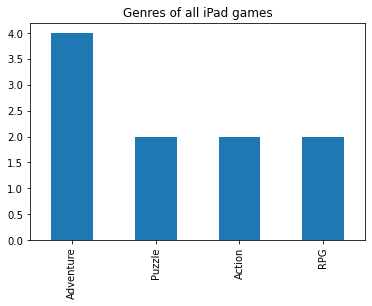

In [6]:
### BEGIN SOLUTION 

import ign_functions

help(ign_functions.get_platform)
help(ign_functions.bar_plot_genres)

ign_functions.bar_plot_genres(ign, 'iPad')

### END SOLUTION 